In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import cmcrameri.cm as cm
import os

%matplotlib inline

In [13]:
# Load data set
base_path = "../../../data/"
cf = xr.load_dataset(os.path.join(base_path, "cloud_fractions.nc"))
temps = xr.load_dataset(os.path.join(base_path, "binned_temperatures.nc"))

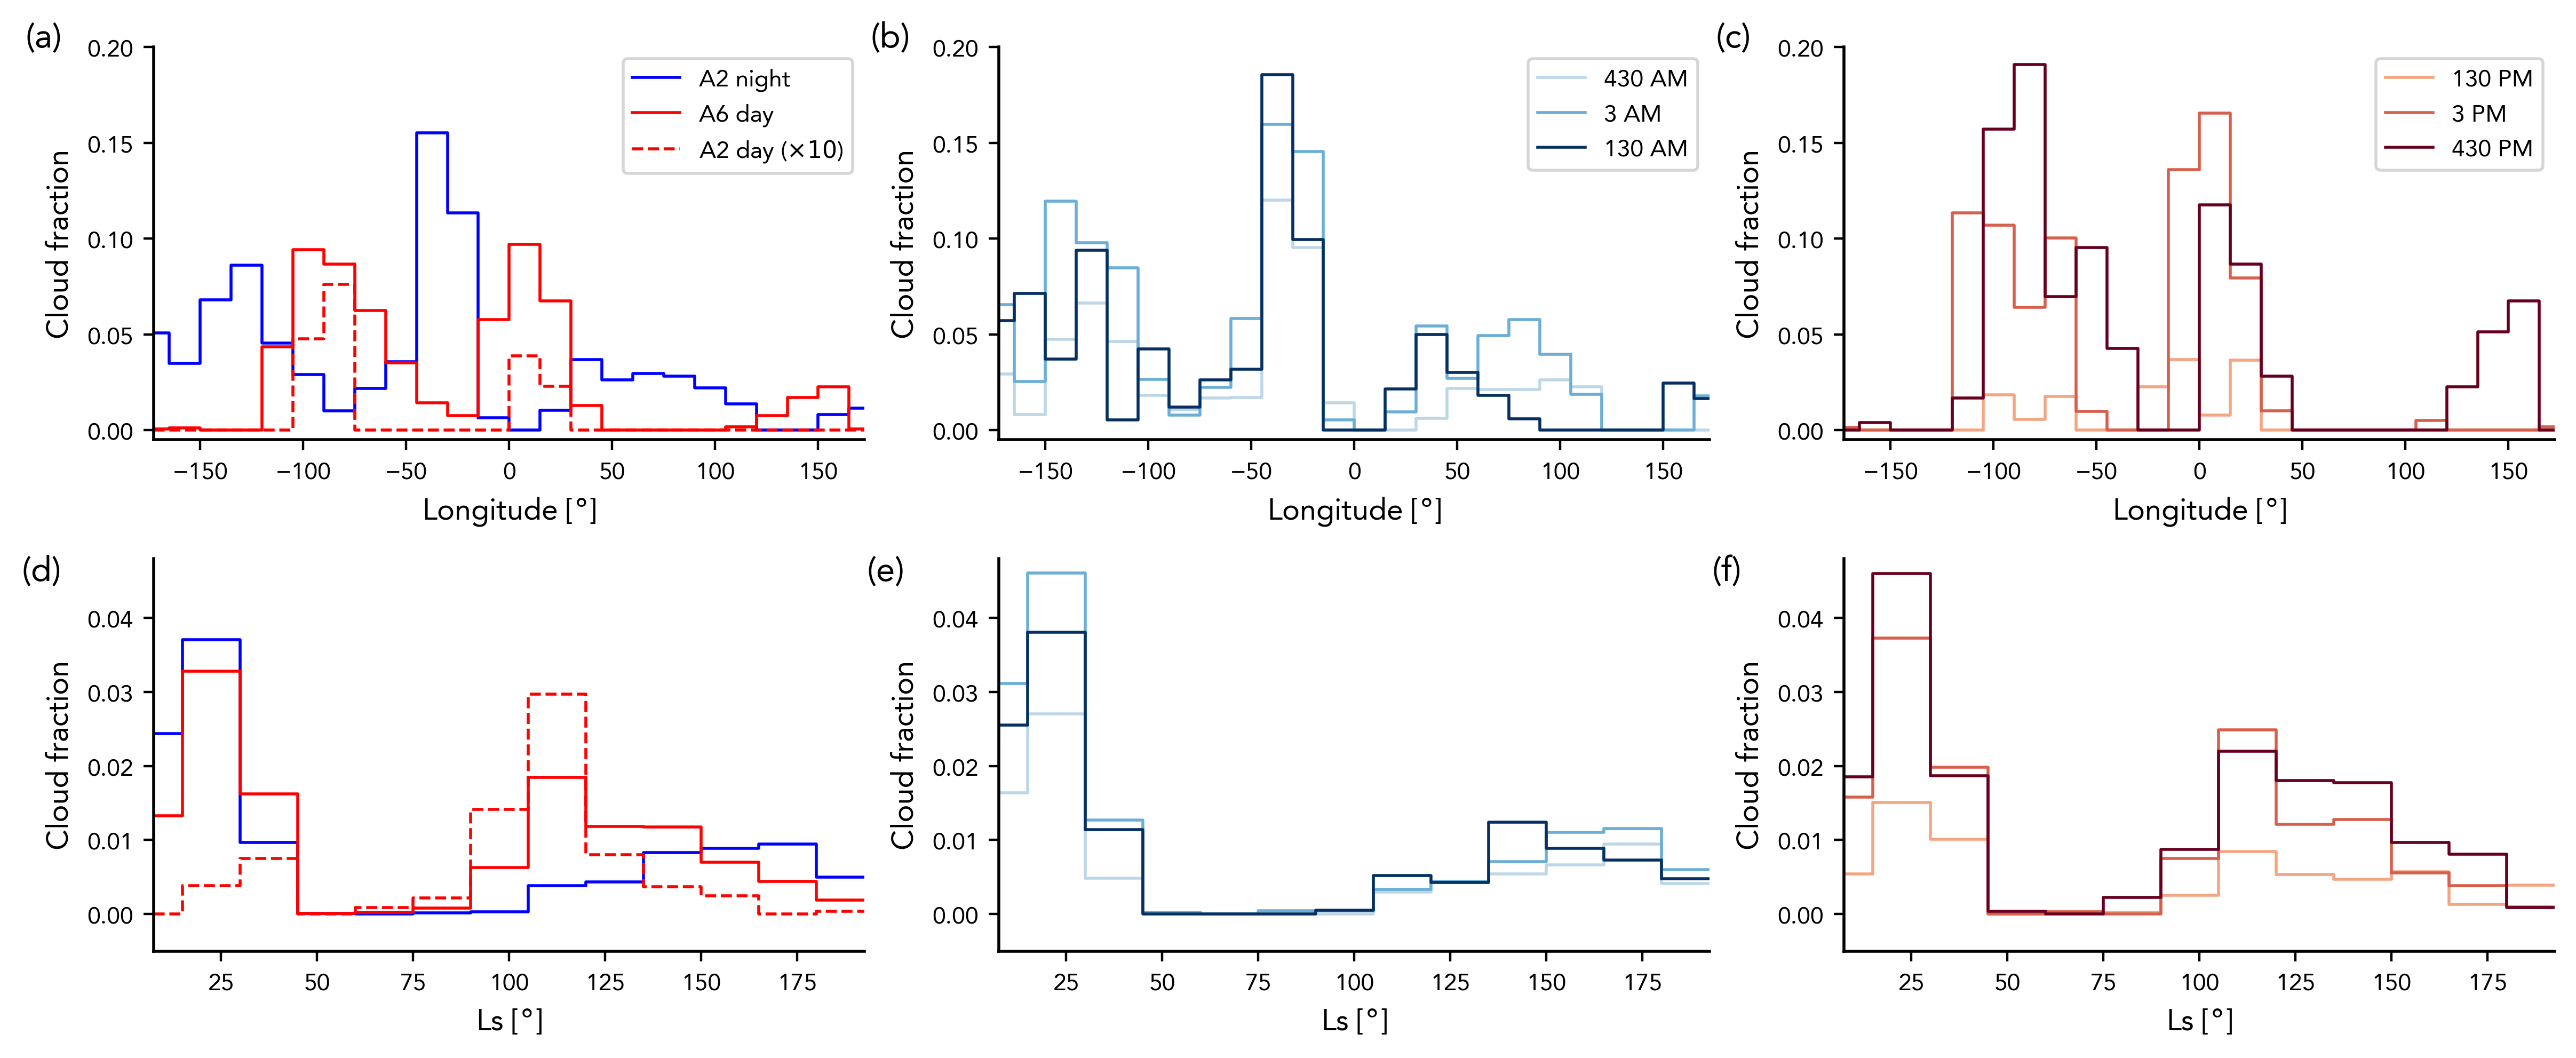

In [10]:
# Make Figure 1
# Set font params
fonts = {
    "font.family": "Avenir",
    "axes.labelsize": 10,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'axes.linewidth': 1
}
matplotlib.rcParams.update(fonts)

ls = 22.5 # Choose Ls
night_alt = 57.5  # 55-60 km on nightside
day_alt = 67.5  # 65-70 km on dayside

# Set colors for local times
n090 = "#bdd7e7"
n180 = "#6baed6"
n270 = "#053061"
d270 = "#67001f"
d180 = "#d6604d"
d090 = "#f4a582"
lw = 1 # step plot line width

fig, ax_ar = plt.subplots(2, 3, figsize=(12, 5), facecolor="w", dpi=400)
ax = ax_ar[0,:]  # top row
ax2 = ax_ar[1,:]  # bottom row

# Top left: day/night averages
# A2 night, average local times
cf["cloud_fraction"].sel(
    LT="night", Ls=ls, channel="A2", alt=night_alt
).mean("direction").plot.step(
    ax=ax[0], label="A2 night",where="mid", lw=lw, color="b"
)
# A6 day, average local times
cf["cloud_fraction"].sel(
    LT="day", Ls=ls, channel="A6", alt=day_alt
).mean("direction").plot.step(
    ax=ax[0], label="A6 day",where="mid", lw=lw, color="r"
)
# A2 day, average local times, display ax x10
(cf["cloud_fraction"]*10).sel(
    LT="day", Ls=ls, channel="A2", alt=day_alt
).mean("direction").plot.step(
    ax=ax[0], label=r"A2 day ($\times 10$)",where="mid", lw=lw, color="r", ls="--"
)

# Top middle, night local times
# 430 AM (left cross-track)
cf["cloud_fraction"].sel(
    LT="night", Ls=ls, channel="A2", alt=night_alt, direction="090"
).plot.step(
    ax=ax[1], where="mid", label="430 AM", ls="-", lw=lw, color=n090
)
# 3 AM (in-track)
cf["cloud_fraction"].sel(
    LT="night", Ls=ls, channel="A2", alt=night_alt, direction="180"
).plot.step(
    ax=ax[1], where="mid", label="3 AM", ls="-", lw=lw, color=n180
)
# 130 AM (right cross-track)
cf["cloud_fraction"].sel(
    LT="night", Ls=ls, channel="A2", alt=night_alt, direction="270"
).plot.step(
    ax=ax[1], where="mid", label="130 AM", ls="-", lw=lw, color=n270
)

# Top right, A6 day local times
# 130 PM (left cross-track)
cf["cloud_fraction"].sel(
    LT="day", Ls=ls, channel="A6", alt=day_alt, direction="090"
).plot.step(
    ax=ax[2], where="mid", label="130 PM", ls="-", lw=lw, color=d090
)
# 3 PM (in-track)
cf["cloud_fraction"].sel(
    LT="day", Ls=ls, channel="A6", alt=day_alt, direction="180"
).plot.step(
    ax=ax[2], where="mid", label="3 PM", ls="-", lw=lw, color=d180
)
# 430 PM (right cross-track)
cf["cloud_fraction"].sel(
    LT="day", Ls=ls, channel="A6", alt=day_alt, direction="270"
).plot.step(
    ax=ax[2], where="mid", label="430 PM", ls="-", lw=lw, color=d270
)

# Format top row axes
for a in ax:
    a.legend()  # add legend to each
    a.set_xlabel(r"Longitude [$\degree$]")
    a.set_ylabel("Cloud fraction")
    a.set_title("")
    a.set_xlim(-172.5, 172.5)
    a.set_ylim(-0.005, 0.2)
    a.spines['top'].set_visible(False)  # remove spines
    a.spines['right'].set_visible(False)
# Add subplot labels
ax[0].annotate(r"(a)", (-235, 0.2), fontsize="x-large", annotation_clip=False)
ax[1].annotate(r"(b)", (-235, 0.2), fontsize="x-large", annotation_clip=False)
ax[2].annotate(r"(c)", (-235, 0.2), fontsize="x-large", annotation_clip=False)


# Bottom row
# Bottom left: day/night averages
# A2 night, average local times
cf["cloud_fraction"].sel(
    LT="night", channel="A2", alt=slice(50, 80)
).max("alt").mean(["lon", "direction"]).plot.step(
    ax=ax2[0], lw=lw, label="A2 night", where="mid", color="b"
)
# A6 day, average local times
cf["cloud_fraction"].sel(
    LT="day", channel="A6", alt=slice(50, 80)
).max("alt").mean(["lon", "direction"]).plot.step(
    ax=ax2[0], lw=lw, label="A6 day", where="mid", color="r"
)
# A2 day, average local times, display as x5
(cf["cloud_fraction"]*5).sel(
    LT="day", channel="A2", alt=slice(50, 80)
).max("alt").mean(["lon", "direction"]).plot.step(
    ax=ax2[0], lw=lw, label=r"A2 day ($\times 5$)", where="mid", color="r", ls="--"
)

# Top middle, night local times
# 430 AM (left cross-track)
cf["cloud_fraction"].sel(
    LT="night", channel="A2", alt=slice(50, 80), direction="090"
).max("alt").mean("lon").plot.step(
    ax=ax2[1], where="mid", label="430 AM", ls="-", lw=lw, color=n090
)
# 3 AM (in-track)
cf["cloud_fraction"].sel(
    LT="night", channel="A2", alt=slice(50, 80), direction="180"
).max("alt").mean("lon").plot.step(
    ax=ax2[1], where="mid", label="3 AM", ls="-", lw=lw, color=n180
)
# 130 AM (right cross-track)
cf["cloud_fraction"].sel(
    LT="night", channel="A2", alt=slice(50, 80), direction="270"
).max("alt").mean("lon").plot.step(
    ax=ax2[1], where="mid", label="130 AM", ls="-", lw=lw, color=n270
)

# Top right, A6 day local times
# 130 PM (left cross-track)
cf["cloud_fraction"].sel(
    LT="day", channel="A6", alt=slice(50, 80), direction="090"
).max("alt").mean("lon").plot.step(
    ax=ax2[2], where="mid", label="130 PM", ls="-", lw=lw, color=d090
)
# 3 PM (in-track)
cf["cloud_fraction"].sel(
    LT="day", channel="A6", alt=slice(50, 80), direction="180"
).max("alt").mean("lon").plot.step(
    ax=ax2[2], where="mid", label="3 PM", ls="-", lw=lw, color=d180
)
# 430 PM (right cross-track)
cf["cloud_fraction"].sel(
    LT="day", channel="A6", alt=slice(50, 80), direction="270"
).max("alt").mean("lon").plot.step(
    ax=ax2[2], where="mid", label="430 PM", ls="-", lw=lw, color=d270
)

# Format top row axes
for a in ax2:
    a.set_xlabel(r"Ls [$\degree$]")
    a.set_ylabel("Cloud fraction")
    a.set_title("")
    a.set_xlim(7.5, 200-7.5)
    a.set_ylim(-0.005, 0.048)
    a.spines['top'].set_visible(False)  # Remove spines
    a.spines['right'].set_visible(False)
# Add subplot labels
ax2[0].annotate(r"(d)", (-27, 0.045), fontsize="x-large", annotation_clip=False)
ax2[1].annotate(r"(e)", (-27, 0.045), fontsize="x-large", annotation_clip=False)
ax2[2].annotate(r"(f)", (-27, 0.045), fontsize="x-large", annotation_clip=False)

fig.tight_layout()

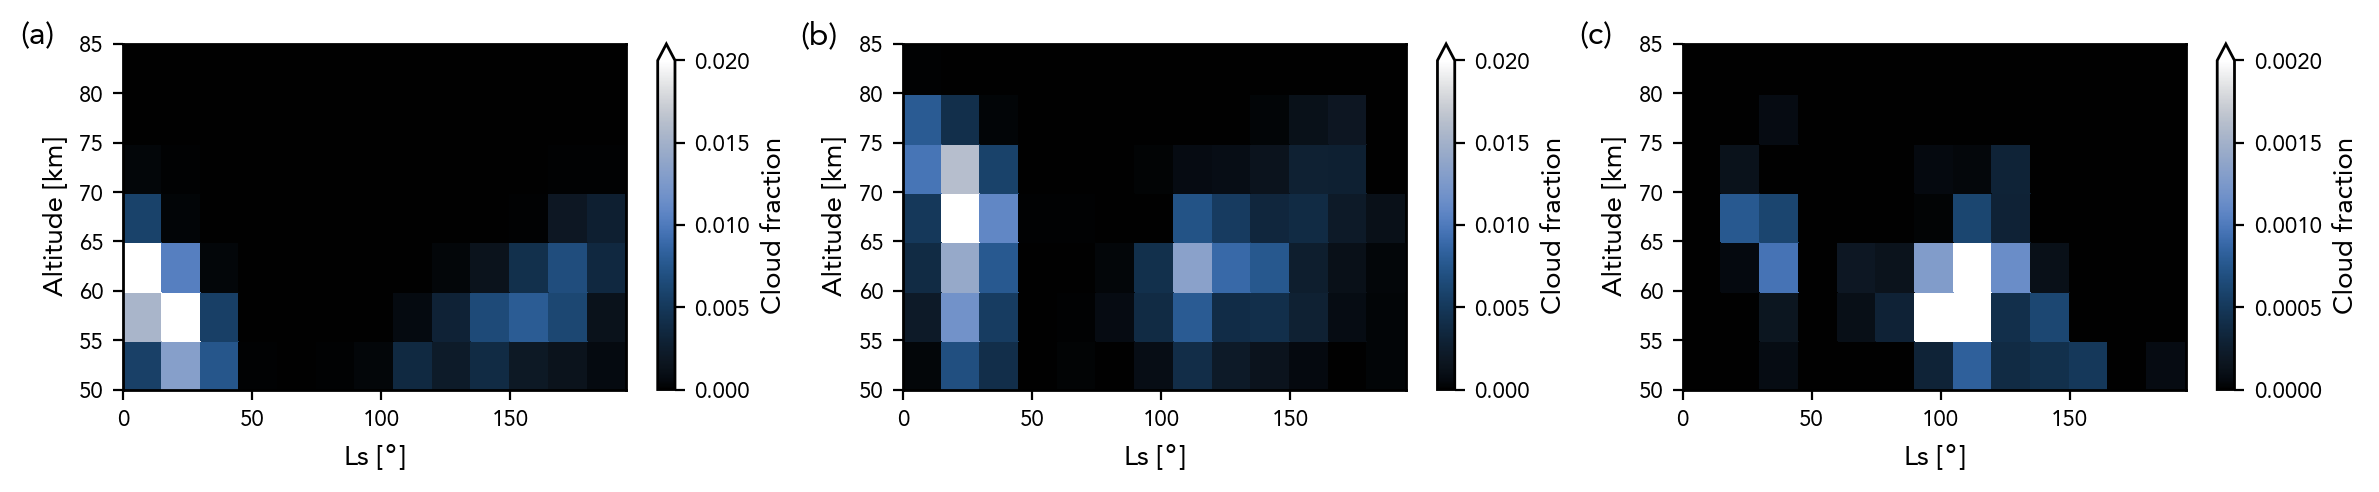

In [11]:
# Make Figure 2
# Set font params
fonts = {
    "font.family": "Avenir",
    "axes.labelsize": 10,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    'axes.linewidth': 1
}
matplotlib.rcParams.update(fonts)

fig, ax = plt.subplots(1, 3, figsize=(12, 2.5), facecolor="w", dpi=200)

# Average A2 night cloud fractions over look-directions and longitude
cf["cloud_fraction"].sel(LT="night", channel="A2").mean(["direction", "lon"]).plot(
    ax=ax[0], x="Ls", y="alt", label="night",edgecolor="face", 
    cbar_kwargs={"label": "Cloud fraction"}, vmin=0, vmax=0.02, cmap=cm.oslo
)
# Average A6 day cloud fractions over look-directions and longitude
cf["cloud_fraction"].sel(LT="day", channel="A6").mean(["direction", "lon"]).plot(
    ax=ax[1], x="Ls", y="alt", label="day", edgecolor="face",
    cbar_kwargs={"label": "Cloud fraction"}, vmin=0, vmax=0.02, cmap=cm.oslo
)
# Average A2 day cloud fractions over look-directions and longitude
cf["cloud_fraction"].sel(LT="day", channel="A2").mean(["direction", "lon"]).plot(
    ax=ax[2], x="Ls", y="alt", label="day", edgecolor="face",
    cbar_kwargs={"label": "Cloud fraction"}, vmin=0, vmax=0.002, cmap=cm.oslo
)

# Add subplot lables
ax[0].annotate(r"(a)", (-40, 85), fontsize="x-large", annotation_clip=False)
ax[1].annotate(r"(b)", (-40, 85), fontsize="x-large", annotation_clip=False)
ax[2].annotate(r"(c)", (-40, 85), fontsize="x-large", annotation_clip=False)

# Format axes
for a in ax:
    a.set_ylabel("Altitude [km]")
    a.set_title("")  # Remove titles
    a.set_xlabel(r"Ls [$\degree$]")
    a.set_ylim(50, 85)
    a.set_xlim(0, 195)

fig.tight_layout()
fig.subplots_adjust(wspace=0.24)

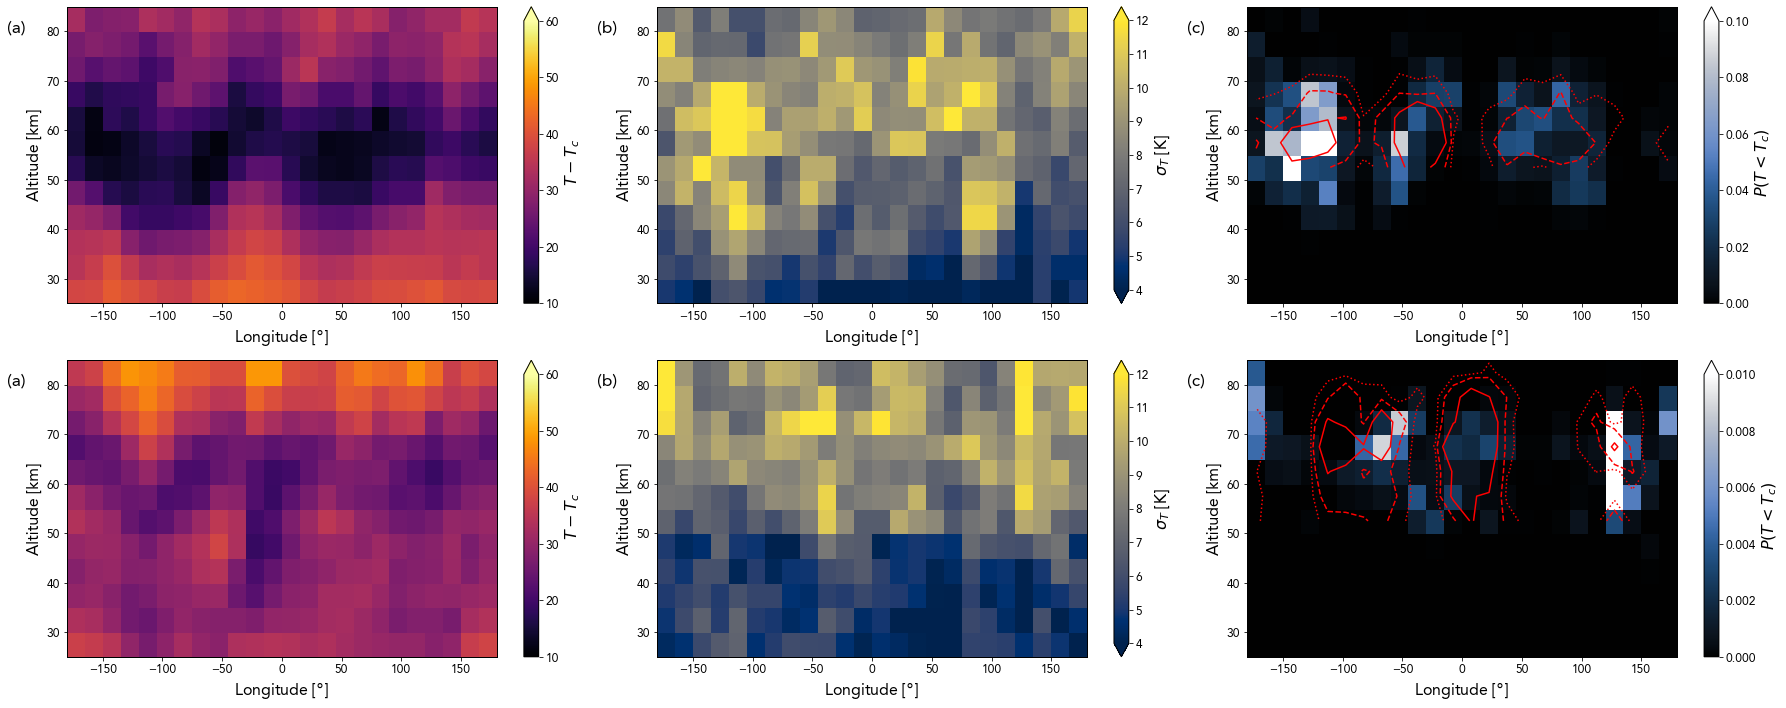

In [14]:
# Make Figure 3
# Format fonts
fonts = {
    "text.usetex": False,
    "font.family": "Avenir", #serif
    "axes.labelsize": 16,
    "font.size": 12,
    "legend.fontsize": 8,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    'axes.linewidth': 1
}
matplotlib.rcParams.update(fonts)

fig, ax_arr = plt.subplots(2, 3, figsize=(25, 10))
look_direction = "180" # in-track
ls = slice(0, 45)  # first cloud phase

ax_top = ax_arr[0]
ax_bottom = ax_arr[1]

plot_params = {
    "T-Tc": {"x":"lon", "edgecolor":"face", "cmap":"inferno", "cbar_kwargs":{"label": r"$T-T_c$"}, "vmin":10, "vmax":60},
    "Tstd": {"x":"lon", "edgecolor":"face", "cmap":"cividis", "cbar_kwargs":{"label": r"$\sigma_T$ [K]"}, "vmin":4, "vmax":12},
    "P(T<Tc)": {"x": "lon", "edgecolor":"face", "cmap":cm.oslo, "cbar_kwargs":{"label": r"$P(T<T_c)$"}, "vmin":0, "vmax":0.1}
}

# TOP ROW: Night
# Top left: T-Tc
(temps["Tmean"] - temps["Tc"]).sel(LT="night", Ls=ls, direction=look_direction).min("Ls").plot(ax=ax_top[0], **plot_params["T-Tc"])
# Top middle: Tstd
temps["Tstd"].sel(LT="night", Ls=ls, direction=look_direction).max("Ls").plot(ax=ax_top[1], **plot_params["Tstd"])
# Top right: P(T<Tc)
temps["P(T<Tc)"].sel(LT="night", Ls=ls, direction=look_direction).max("Ls").plot(ax=ax_top[2], **plot_params["P(T<Tc)"])
cf["cloud_fraction"].sel(
    LT="night", Ls=ls, channel="A2", direction=look_direction
).max("Ls").plot.contour(
    ax=ax_top[2], x="lon", y="alt", levels=[0.006, 0.02, 0.06], cmap='r', linestyles=[":",'--', "-"]
)
# Format axes
for a in ax_top:
    a.set_title("")
    a.set_ylim(25, 85)
    a.set_ylabel("Altitude [km]")
    a.set_xlabel(r"Longitude [$\degree$]")
# Add subplot labels
ax_top[0].annotate(r"(a)", (-230, 80), fontsize="x-large", annotation_clip=False)
ax_top[1].annotate(r"(b)", (-230, 80), fontsize="x-large", annotation_clip=False)
ax_top[2].annotate(r"(c)", (-230, 80), fontsize="x-large", annotation_clip=False)

# BOTTOM ROW: Day
# Bottom left: T-Tc
(temps["Tmean"] - temps["Tc"]).sel(LT="day", Ls=ls, direction=look_direction).min("Ls").plot(ax=ax_bottom[0], **plot_params["T-Tc"])
# Bottom middle: Tstd
temps["Tstd"].sel(LT="day", Ls=ls, direction=look_direction).max("Ls").plot(ax=ax_bottom[1], **plot_params["Tstd"])
# Bottom right: P(T<Tc)
plot_params["P(T<Tc)"].update(vmax=0.01)  # Use different range for smaller daytime P(T<Tc)
temps["P(T<Tc)"].sel(LT="day", Ls=ls, direction=look_direction).max("Ls").plot(ax=ax_bottom[2], **plot_params["P(T<Tc)"])
cf["cloud_fraction"].sel(
    LT="day", Ls=ls, channel="A6", direction=look_direction
).max("Ls").plot.contour(
    ax=ax_bottom[2], x="lon", y="alt", levels=[0.006, 0.02, 0.06], cmap='r', linestyles=[":",'--', "-"]
)
# Format axes
for a in ax_bottom:
    a.set_title("")
    a.set_ylim(25, 85)
    a.set_ylabel("Altitude [km]")
    a.set_xlabel(r"Longitude [$\degree$]")
# Add subplot labels
ax_bottom[0].annotate(r"(a)", (-230, 80), fontsize="x-large", annotation_clip=False)
ax_bottom[1].annotate(r"(b)", (-230, 80), fontsize="x-large", annotation_clip=False)
ax_bottom[2].annotate(r"(c)", (-230, 80), fontsize="x-large", annotation_clip=False)

fig.tight_layout()

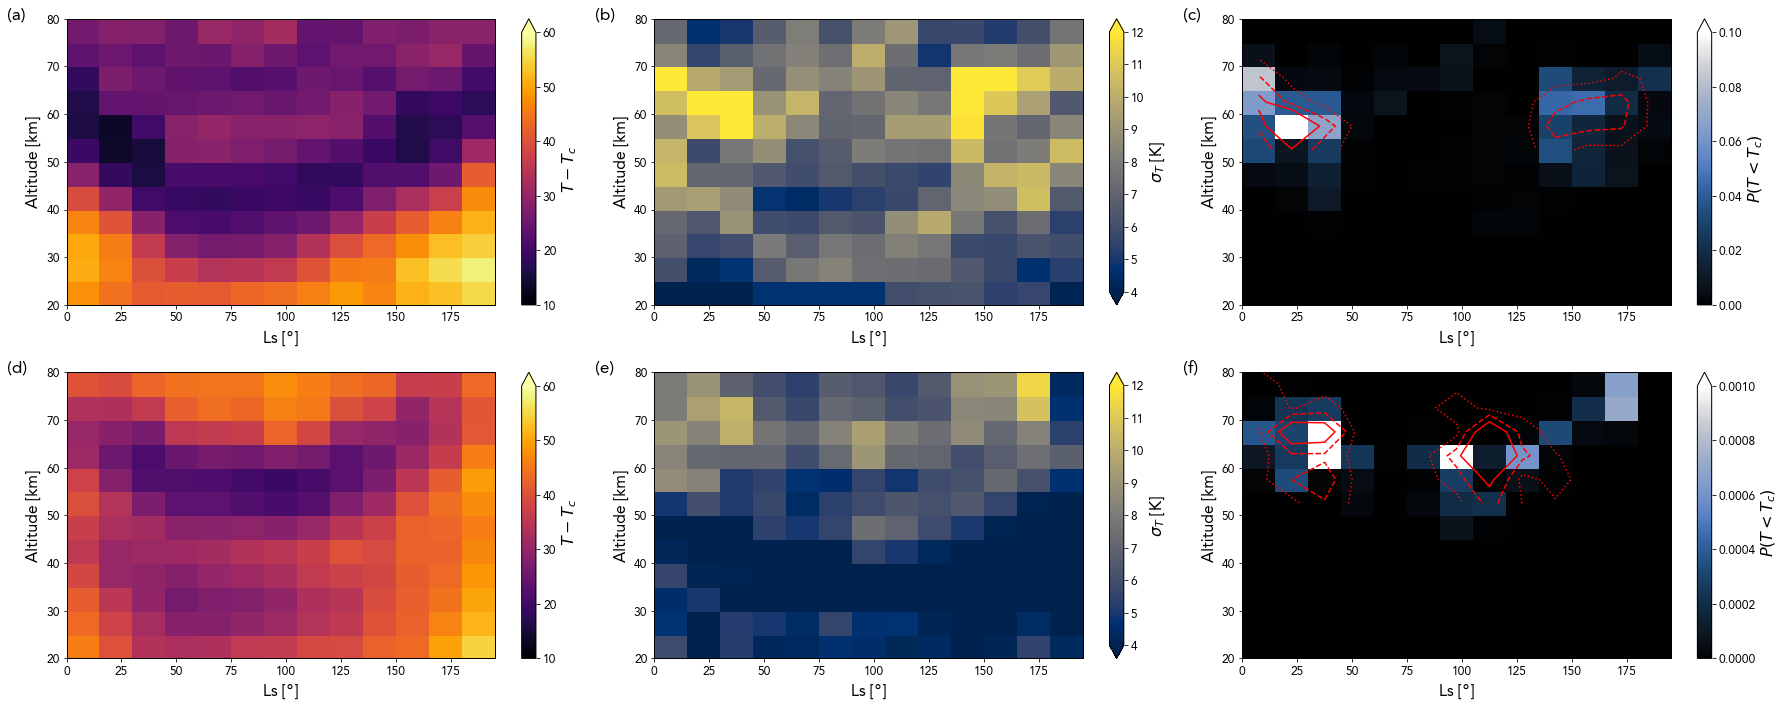

In [15]:
# Make Figure 4
# Format fonts
fonts = {
    "text.usetex": False,
    "font.family": "Avenir", #serif
    "axes.labelsize": 16,
    "font.size": 12,
    "legend.fontsize": 8,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    'axes.linewidth': 1
}
matplotlib.rcParams.update(fonts)

fig, ax_arr = plt.subplots(2, 3, figsize=(25, 10))
look_direction = "180" # in-track
lon = -127.5

ax_top = ax_arr[0]
ax_bottom = ax_arr[1]

plot_params = {
    "T-Tc": {"x":"Ls", "edgecolor":"face", "cmap":"inferno", "cbar_kwargs":{"label": r"$T-T_c$"}, "vmin":10, "vmax":60},
    "Tstd": {"x":"Ls", "edgecolor":"face", "cmap":"cividis", "cbar_kwargs":{"label": r"$\sigma_T$ [K]"}, "vmin":4, "vmax":12},
    "P(T<Tc)": {"x": "Ls", "edgecolor":"face", "cmap":cm.oslo, "cbar_kwargs":{"label": r"$P(T<T_c)$"}, "vmin":0, "vmax":0.1}
}

# TOP ROW: Night
# Top left: T-Tc
(temps["Tmean"] - temps["Tc"]).sel(LT="night", lon=lon, direction=look_direction).plot(ax=ax_top[0], **plot_params["T-Tc"])
# Top middle: Tstd
temps["Tstd"].sel(LT="night", lon=lon, direction=look_direction).plot(ax=ax_top[1], **plot_params["Tstd"])
# Top right: P(T<Tc)
temps["P(T<Tc)"].sel(LT="night", lon=lon, direction=look_direction).plot(ax=ax_top[2], **plot_params["P(T<Tc)"])
cf["cloud_fraction"].sel(
    LT="night", lon=lon, channel="A2", direction=look_direction
).plot.contour(
    ax=ax_top[2], x="Ls", y="alt", levels=[0.005, 0.02, 0.04], cmap='r', linestyles=[":",'--', "-"]
)
# Format axes
for a in ax_top:
    a.set_title("")
    a.set_ylim(20, 80)
    a.set_ylabel("Altitude [km]")
    a.set_xlabel(r"Ls [$\degree$]")
# Subplot labels
ax_top[0].annotate(r"(a)", (-27, 80), fontsize="x-large", annotation_clip=False)
ax_top[1].annotate(r"(b)", (-27, 80), fontsize="x-large", annotation_clip=False)
ax_top[2].annotate(r"(c)", (-27, 80), fontsize="x-large", annotation_clip=False)

# TOP ROW: Day
lon=-82.5
# Top left: T-Tc
(temps["Tmean"] - temps["Tc"]).sel(LT="day", lon=lon, direction=look_direction).plot(ax=ax_bottom[0], **plot_params["T-Tc"])
# Top middle: Tstd
temps["Tstd"].sel(LT="day", lon=lon, direction=look_direction).plot(ax=ax_bottom[1], **plot_params["Tstd"])
# Top right: P(T<Tc)
plot_params["P(T<Tc)"].update(vmax=0.001)  # Use different range for smaller daytime P(T<Tc)
temps["P(T<Tc)"].sel(LT="day", lon=lon, direction=look_direction).plot(ax=ax_bottom[2], **plot_params["P(T<Tc)"])
cf["cloud_fraction"].sel(
    LT="day", lon=lon, channel="A6", direction=look_direction
).plot.contour(
    ax=ax_bottom[2], x="Ls", y="alt", levels=[0.005, 0.02, 0.04], cmap='r', linestyles=[":",'--', "-"]
)
# Format axes
for a in ax_bottom:
    a.set_title("")
    a.set_ylim(20, 80)
    a.set_ylabel("Altitude [km]")
    a.set_xlabel(r"Ls [$\degree$]")
# Subplot labels
ax_bottom[0].annotate(r"(d)", (-27, 80), fontsize="x-large", annotation_clip=False)
ax_bottom[1].annotate(r"(e)", (-27, 80), fontsize="x-large", annotation_clip=False)
ax_bottom[2].annotate(r"(f)", (-27, 80), fontsize="x-large", annotation_clip=False)

fig.tight_layout()